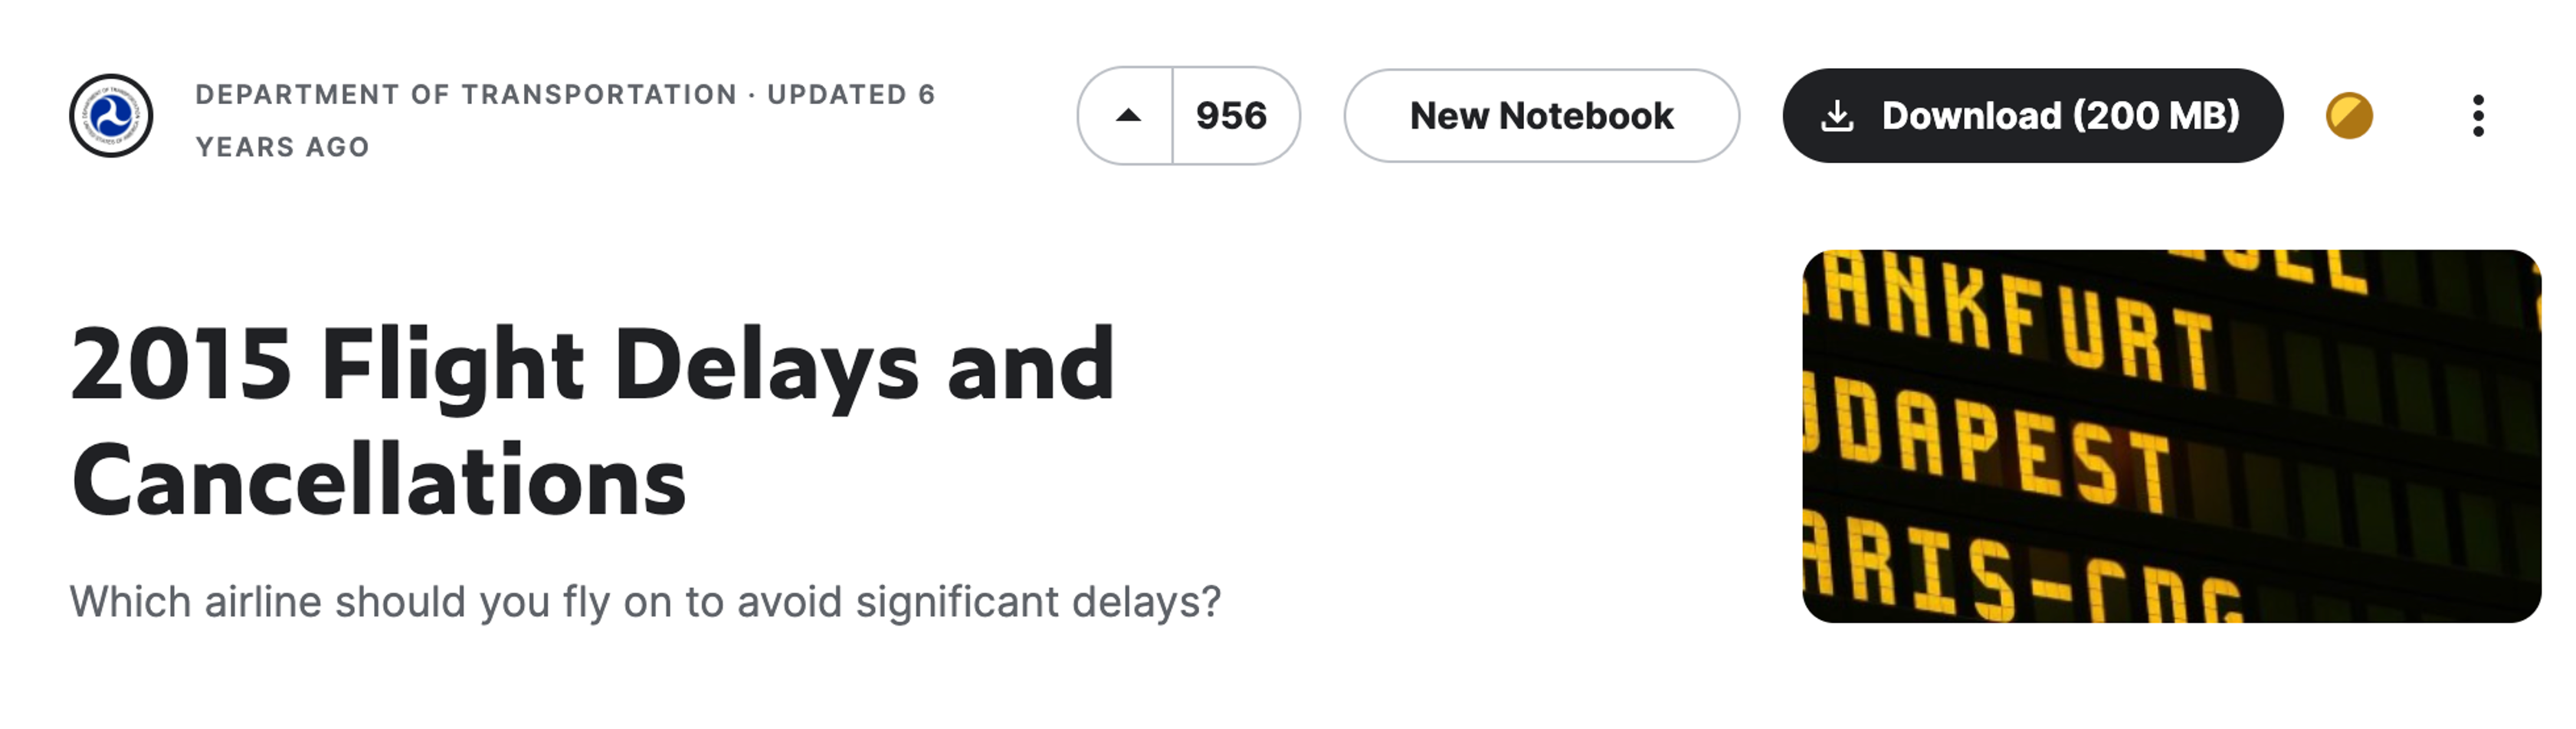

Dataset download link: https://www.kaggle.com/datasets/usdot/flight-delays

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights.csv', low_memory=False)
df

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER   
0        2015      1    1            4      AS             98      N407AS  \
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...   
0                  ANC                 SEA                    5  ...  \
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED   
0               408.0          -22.0         0          0  \
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY   
0                        NaN               NaN             NaN            NaN  \
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

In [3]:
df.head(2).T

0       1
YEAR                   2015    2015
MONTH                     1       1
DAY                       1       1
DAY_OF_WEEK               4       4
AIRLINE                  AS      AA
FLIGHT_NUMBER            98    2336
TAIL_NUMBER          N407AS  N3KUAA
ORIGIN_AIRPORT          ANC     LAX
DESTINATION_AIRPORT     SEA     PBI
SCHEDULED_DEPARTURE       5      10
DEPARTURE_TIME       2354.0     2.0
DEPARTURE_DELAY       -11.0    -8.0
TAXI_OUT               21.0    12.0
WHEELS_OFF             15.0    14.0
SCHEDULED_TIME        205.0   280.0
ELAPSED_TIME          194.0   279.0
AIR_TIME              169.0   263.0
DISTANCE               1448    2330
WHEELS_ON             404.0   737.0
TAXI_IN                 4.0     4.0
SCHEDULED_ARRIVAL       430     750
ARRIVAL_TIME          408.0   741.0
ARRIVAL_DELAY         -22.0    -9.0
DIVERTED                  0       0
CANCELLED                 0       0
CANCELLATION_REASON     NaN     NaN
AIR_SYSTEM_DELAY        NaN     NaN
SECURITY_DELAY          NaN     NaN
AIRLINE_DELAY           NaN     NaN
LATE_AIRCRAFT_DELAY     NaN     NaN
WEATHER_DELAY           NaN     NaN

In [4]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
airlines = pd.read_csv('airlines.csv')
airlines

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

## Merge airlines name into df

In [7]:
df = pd.merge(df,airlines, left_on='AIRLINE', right_on = 'IATA_CODE')
df.insert(loc=5, column='AIRLINE', value=df.AIRLINE_y)
df = df.drop(['AIRLINE_y','IATA_CODE'], axis=1)

## Merge airport name into df

In [8]:
airport = pd.read_csv('airports.csv')
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)
df = pd.merge(df,airport[['IATA_CODE','AIRPORT','CITY']], left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)

In [9]:
df.head(2).T

0   
YEAR                                                        2015  \
MONTH                                                          1   
DAY                                                            1   
DAY_OF_WEEK                                                    4   
AIRLINE_x                                                     AS   
AIRLINE                                     Alaska Airlines Inc.   
FLIGHT_NUMBER                                                 98   
TAIL_NUMBER                                               N407AS   
ORIGIN_AIRPORT                                               ANC   
DESTINATION_AIRPORT                                          SEA   
SCHEDULED_DEPARTURE                                            5   
DEPARTURE_TIME                                            2354.0   
DEPARTURE_DELAY                                            -11.0   
TAXI_OUT                                                    21.0   
WHEELS_OFF                                                  15.0   
SCHEDULED_TIME                                             205.0   
ELAPSED_TIME                                               194.0   
AIR_TIME                                                   169.0   
DISTANCE                                                    1448   
WHEELS_ON                                                  404.0   
TAXI_IN                                                      4.0   
SCHEDULED_ARRIVAL                                            430   
ARRIVAL_TIME                                               408.0   
ARRIVAL_DELAY                                              -22.0   
DIVERTED                                                       0   
CANCELLED                                                      0   
CANCELLATION_REASON                                          NaN   
AIR_SYSTEM_DELAY                                             NaN   
SECURITY_DELAY                                               NaN   
AIRLINE_DELAY                                                NaN   
LATE_AIRCRAFT_DELAY                                          NaN   
WEATHER_DELAY                                                NaN   
AIRPORT_x            Ted Stevens Anchorage International Airport   
CITY_x                                                 Anchorage   
AIRPORT_y                   Seattle-Tacoma International Airport   
CITY_y                                                   Seattle   

                                                               1  
YEAR                                                        2015  
MONTH                                                          1  
DAY                                                            1  
DAY_OF_WEEK                                                    4  
AIRLINE_x                                                     AS  
AIRLINE                                     Alaska Airlines Inc.  
FLIGHT_NUMBER                                                108  
TAIL_NUMBER                                               N309AS  
ORIGIN_AIRPORT                                               ANC  
DESTINATION_AIRPORT                                          SEA  
SCHEDULED_DEPARTURE                                           45  
DEPARTURE_TIME                                              41.0  
DEPARTURE_DELAY                                             -4.0  
TAXI_OUT                                                    17.0  
WHEELS_OFF                                                  58.0  
SCHEDULED_TIME                                             204.0  
ELAPSED_TIME                                               194.0  
AIR_TIME                                                   173.0  
DISTANCE                                                    1448  
WHEELS_ON                                                  451.0  
TAXI_IN                                                      4.0  
SCHEDULED_ARRIVAL                                            509  
ARRIV

## Departure airport count

In [10]:
dff = df['AIRPORT_x'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout( title='Origin Airport Distribution' )

fig = go.Figure(data=data, layout=layout)
fig.update_layout( height=600)

fig.show()

In [11]:
dff = df.CITY_x.value_counts()[:10]

trace = go.Bar(x=dff.index, y=dff.values,
    marker=dict( color = dff.values,
        colorscale='Jet', showscale=True ) )

data = [trace]
layout = go.Layout( title='Origin City Distribution', 
                   yaxis = dict(title = '# of Flights') )

fig = go.Figure(data=data, layout=layout)
fig.show()

## Top 10 Airlines flights count

In [12]:
dff = df.AIRLINE.value_counts()[:10]

trace = go.Bar(x=dff.index, y=dff.values,
    marker=dict( color = dff.values, colorscale='Jet',
        showscale=True) )

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Airline distribution', yaxis = dict(title = '# of Flights'))

fig = go.Figure(data=data, layout=layout)
fig.show()

## Transform month number

In [13]:
df.MONTH.value_counts().reset_index().sort_values(by='MONTH')

MONTH   count
7       1  469968
10      2  429191
2       3  504312
5       4  485151
4       5  496993
3       6  503897
0       7  520718
1       8  510536
9       9  464946
8      11  467972
6      12  479230

In [14]:
dff

AIRLINE
Southwest Airlines Co.          1157339
Delta Air Lines Inc.             800329
American Airlines Inc.           648694
Skywest Airlines Inc.            539545
Atlantic Southeast Airlines      526249
United Air Lines Inc.            469829
American Eagle Airlines Inc.     272650
JetBlue Airways                  245135
US Airways Inc.                  198715
Alaska Airlines Inc.             158054
Name: count, dtype: int64

In [15]:
dff = df.MONTH.value_counts().reset_index().sort_values(by='MONTH')

dff.columns = ['MONTH', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.MONTH = dff.MONTH.map(month)

trace = go.Bar(
    x=dff.MONTH,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='# of Flights (monthly)', 
    yaxis = dict(title = '# of Flights'
                                                )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Delay ratio per month

In [16]:
df['dep_delay'] = np.where(df.DEPARTURE_DELAY > 0, 1, 0)
df['arr_delay'] = np.where(df.ARRIVAL_DELAY > 0, 1, 0)
dff = df.groupby('MONTH').dep_delay.mean().round(2)

dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker = dict(
        color = 'aqua'
    )
)

dff = df.groupby('MONTH').arr_delay.mean().round(2)
dff.index = dff.index.map(month)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Transform week day number

In [17]:
df.DAY_OF_WEEK.value_counts().sort_index().to_frame()

count
DAY_OF_WEEK        
1            799248
2            780858
3            790991
4            789594
5            779708
6            637814
7            754701

In [18]:
df.DAY_OF_WEEK.value_counts().sort_index()

DAY_OF_WEEK
1    799248
2    780858
3    790991
4    789594
5    779708
6    637814
7    754701
Name: count, dtype: int64

In [19]:
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 
                                           6:'Saturday', 7:'Sunday'}

dff = df.DAY_OF_WEEK.value_counts().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Weather',
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='# of Flights (Day of Week)', 
    yaxis = dict(title = '# of Flights'
                                                    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Air Traffic by Cities

In [20]:
# pip install seaborn --upgrade

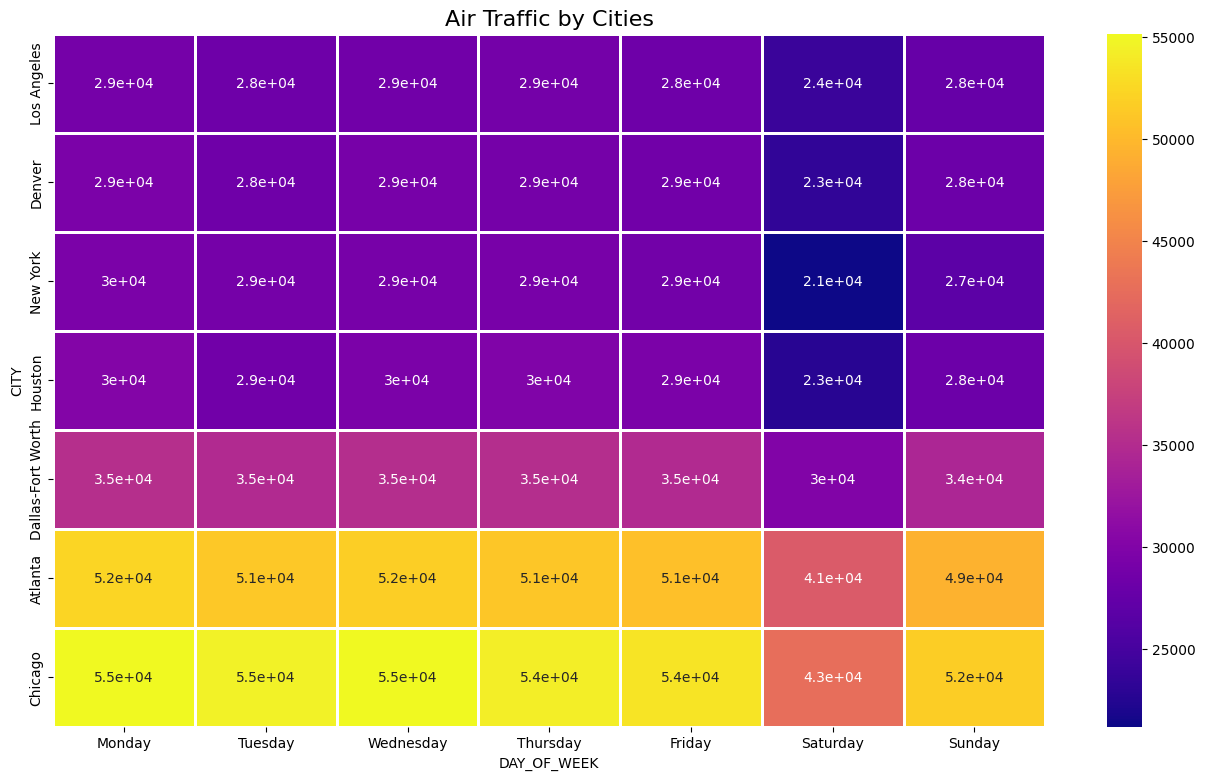

In [21]:
flight_volume = df.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='plasma',linecolor="w", linewidths=2, annot=True)

plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], ['Monday', 'Tuesday', 'Wednesday', 
                                'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [22]:
fv

DAY_OF_WEEK              1        2        3        4        5        6   
CITY_x                                                                    
Los Angeles        29027.0  28276.0  28523.0  28785.0  28317.0  24061.0  \
Denver             29489.0  28392.0  29036.0  29026.0  28593.0  23369.0   
New York           29516.0  28915.0  29121.0  29173.0  28639.0  21212.0   
Houston            30193.0  28587.0  29560.0  29883.0  29489.0  22780.0   
Dallas-Fort Worth  35347.0  34762.0  35141.0  35215.0  34771.0  30042.0   
Atlanta            52261.0  51208.0  51703.0  51140.0  50583.0  40534.0   
Chicago            55136.0  54592.0  55005.0  54337.0  53539.0  42598.0   

DAY_OF_WEEK              7  
CITY_x                      
Los Angeles        27684.0  
Denver             28150.0  
New York           26840.0  
Houston            28172.0  
Dallas-Fort Worth  34273.0  
Atlanta            49407.0  
Chicago            51563.0

## Delay ratio per week

In [23]:
dff = df.groupby('DAY_OF_WEEK').dep_delay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker=dict(
        color = 'cyan'
    )
)

dff = df.groupby('DAY_OF_WEEK').arr_delay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'indigo'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Day of Week)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Airlines’ mean arrival and departure delay

In [24]:
dff = df.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                    ascending=False).round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    name='departure_delay',
    marker=dict(color = 'navy' )
)

dff = df.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                    ascending=False).round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
    yaxis = dict(title = 'minute'), barmode='stack')

fig = go.Figure(data=data, layout=layout)
fig.show()

## Mean (Departure Delay - Arrival Delay) offset

In [25]:
df['DEP_ARR_DIFF'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']
dff = df.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                    ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Departure Delay - Arrival Delay) by Airlines', 
                   yaxis = dict(title = 'minute')
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

In [26]:
from plotly.subplots import make_subplots

dff = df.groupby('CITY_x').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                        ascending=False)[:8].round(2)
trace1 = go.Bar( x=dff.index, y=dff.DEPARTURE_DELAY, marker=dict( color = 'red' ) )

dff = df.groupby('CITY_y').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                        ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    marker=dict(color = 'navy' ))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Mean Departure Delay by City', 
                                                          'Mean Arrival Delay by City'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850, 
                     title='Is it a systematic delay related to departure or arrival city?',  
                     showlegend=False)                    
fig.show()

## Lowest Mean Arrival Delay by Cities

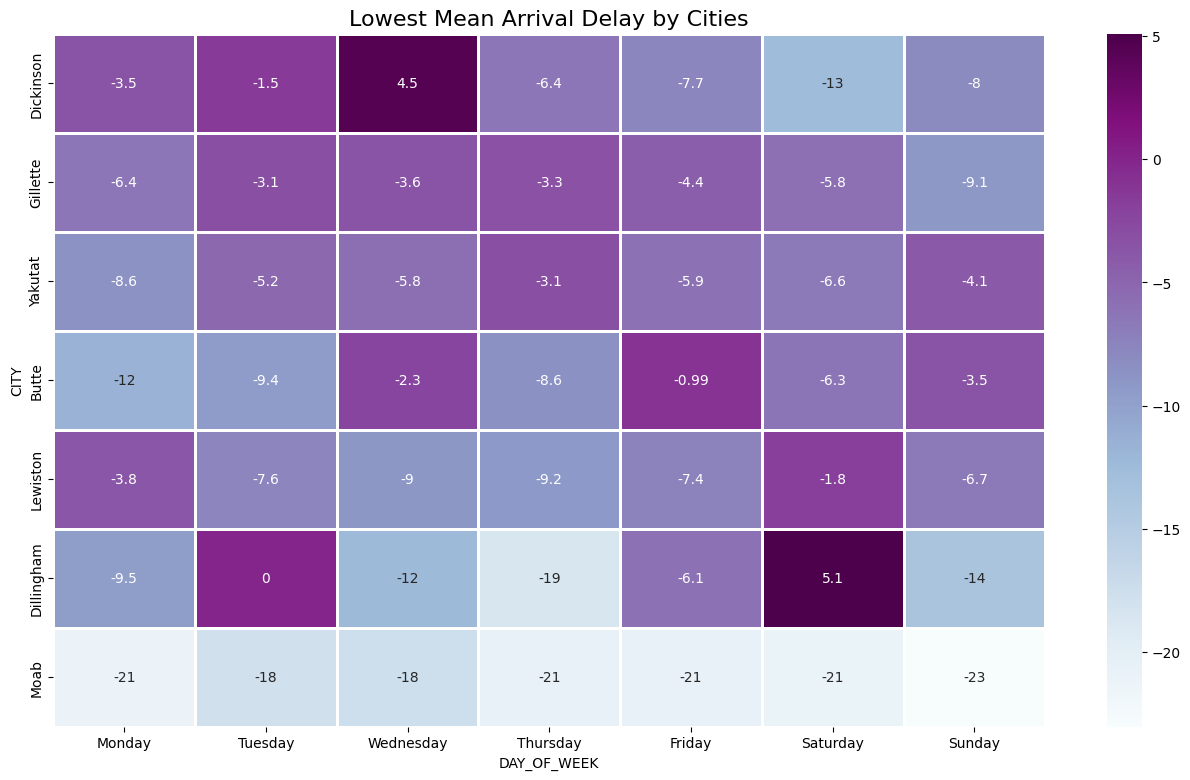

In [27]:
arr = df.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7]

fv = arr.sort_values(by='sum')[:7]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)
fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='BuPu',linecolor="w", linewidths=2, annot=True)

plt.title('Lowest Mean Arrival Delay by Cities', size=16)
plt.ylabel('CITY')
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], ['Monday', 'Tuesday', 'Wednesday', 
                                'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

## Mean (Departure Delay - Arrival Delay)offset by Airlines

In [28]:
df['DEP_ARR_DIFF'] = df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']
dff = df.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                    ascending=False).round(2)

trace = go.Bar( x=dff.index, y=dff.DEP_ARR_DIFF,
    marker=dict( color = dff.DEP_ARR_DIFF, colorscale='Jet', showscale=True  ))

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Departure Delay - Arrival Delay) by Airlines', 
                   yaxis = dict(title = 'minute')       )

fig = go.Figure(data=data, layout=layout)
fig.show()

## Mean Speed by Airlines

In [29]:
df['SPEED'] = 60*df['DISTANCE']/df['AIR_TIME']
dff = df.groupby('AIRLINE').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                    ascending=False).round(2)

trace = go.Scatter( x=dff.index, y=dff.SPEED, mode='markers',
    marker=dict( sizemode = 'diameter',  sizeref = 1, size = 30,
        color = dff.SPEED.values, colorscale='Jet', showscale=True ) )

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Mean Speed by Airlines', yaxis = dict(title = 'Speed') )

fig = go.Figure(data=data, layout=layout)
fig.show()

## Cancelation Rate by Airlines

In [30]:
dff = df.groupby('AIRLINE')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                                    ascending=False).round(3)

trace1 = go.Scatter( x=dff.index, y=dff.CANCELLED,
    mode='markers',  marker=dict( symbol = 'star-square', sizemode = 'diameter',
        sizeref = 1,  size = 30,  color = dff.CANCELLED, colorscale='Portland',
        showscale=True    ) )

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate' ) )

fig = go.Figure(data=data, layout=layout)
fig.show()

In [31]:
dff = df.groupby('CITY_x')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                            ascending=False)[:10].round(3)
trace2 = go.Scatter( x=dff.index,  y=dff.CANCELLED,
    mode='markers', marker=dict(symbol = 'diamond', sizemode = 'diameter',
        sizeref = 1, size = 30, color = dff.CANCELLED,
        colorscale='Portland', showscale=True ) )

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Cities', 
                   yaxis = dict(title = 'Cancellation Rate' ) )

fig = go.Figure(data=data, layout=layout)
fig.show()

## Number of of Cancelled Flights (monthly)

In [32]:
reason={'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'}
df.CANCELLATION_REASON = df.CANCELLATION_REASON.map(reason)

dff = df[df.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by='MONTH')
dff.columns = ['month', 'flight_num']
dff.month = dff.month.map(month)

trace = go.Bar(  x=dff.month,   y=dff.flight_num,
    marker=dict( color = dff.flight_num,  colorscale='Reds', showscale=True ) )

data = [trace]
layout = go.Layout(
    title='# of Cancelled Flights (monthly)', 
    yaxis = dict(title = '# of Flights'  ) )

fig = go.Figure(data=data, layout=layout)
fig.show()

## Cancellation Reasons (Monthly)

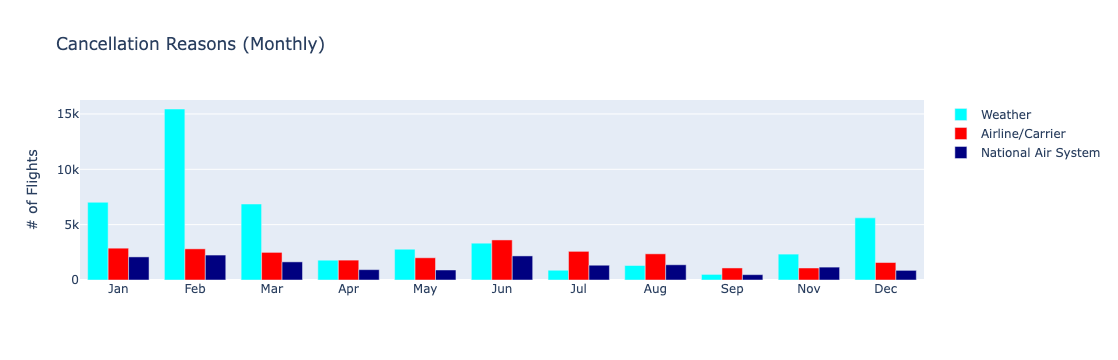

In [36]:
dff = df[df.CANCELLATION_REASON=='Weather'].MONTH.value_counts().to_frame().sort_index()
dff.index = dff.index.map(month)

trace1 = go.Bar( x=dff.index,  y=dff['count'],  name = 'Weather',
    marker=dict(  color = 'aqua'   ))

dff = df[df.CANCELLATION_REASON=='Airline/Carrier'].MONTH.value_counts().to_frame().sort_index()
dff.index = dff.index.map(month)

trace2 = go.Bar(  x=dff.index,  y=dff['count'],   name='Airline/Carrier',
    marker=dict(  color = 'red'  ))

dff = df[df.CANCELLATION_REASON=='National Air System'].MONTH.value_counts().to_frame().sort_index()
dff.index = dff.index.map(month)

trace3 = go.Bar( x=dff.index,  y=dff['count'],   name='National Air System',
    marker=dict(  color = 'navy'  ))

data = [trace1,trace2,trace3]
layout = go.Layout( title='Cancellation Reasons (Monthly)', 
    yaxis = dict(title = '# of Flights'  ))

fig = go.Figure(data=data, layout=layout)
fig.show()

## Correlation of variables

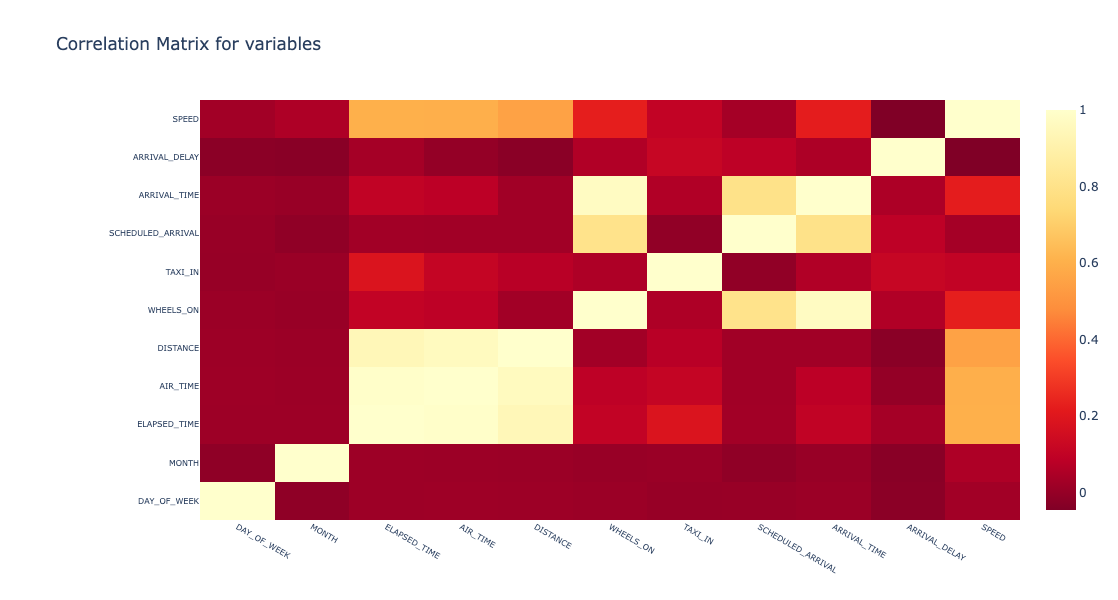

In [37]:
correlation = df[['DAY_OF_WEEK','MONTH','ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                   'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
                   'ARRIVAL_DELAY','SPEED']].fillna(0).corr()
cols = correlation.columns.values
corr  = correlation.values
trace = go.Heatmap(z = corr,  x = cols, y = cols,
                   colorscale = "YlOrRd", reversescale = True  ) 

data = [trace]
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,  height  = 600, width   = 800,
                        margin  = dict(l = 200 ),
                        yaxis   = dict(tickfont = dict(size = 8)),
                        xaxis   = dict(tickfont = dict(size = 8))
                       )
                  )
fig = go.Figure(data=data,layout=layout)
fig.show()